## Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,classification_report

## Loading the data into Dataframe

In [3]:
PDdata=pd.read_csv('Data - Parkinsons')

In [4]:
PDdata.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## EDA Shape & Type of Data

In [5]:
PDdata.shape

(195, 24)

There are 195 Observations of Voice Recordings and 24 attributes in the dataset

In [6]:
PDdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Here all the attributes are Continuous Values expect Name attribute which is the Patient Name for Identification.

Here our Target Variable is Status which is Binary.The inference from Status attribute is

1 - Patients having Parkinsons Diesase

0- Patients not having Parkinsons Diesase

## EDA - Checking the Presence of Missing Values

In [7]:
PDdata.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

This Dataset does not have any Null Values

## EDA - Five Point Summary

In [8]:
PDdata.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


From the Describe Summary,We can observe that in some columns there are outliers & some of the columns are Positively Skewed.We need to handle this in Univariate Analysis

## EDA - Univariate Analysis

In [9]:
PDdata.kurtosis(numeric_only=True)

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

We can observe that in Some Columns,the Kurtosis Value is greater than 1 which means that columns have more data points around the tail

In [10]:
PDdata.skew(numeric_only=True)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

We can Observe that in some Columns having Positive Values greater than 1 which indicates data is heavily skewed towards right

### EDA -Univariate Plots

In [11]:
def plots(feature):
    fig = plt.figure(constrained_layout = True, figsize=(10,3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[0,:3])    
    sns.distplot(PDdata[feature]);
    ax2 = fig.add_subplot(gs[0,3])    
    sns.boxplot(PDdata[feature]);

Here we are defined function for drawing distplot & boxplot to visualize each attribute distribution

### Average vocal fundamental frequency (MDVP:Fo(Hz))

Skewness : 0.5917374636540784
Kurtosis : -0.6278981066788805
Median : 148.79


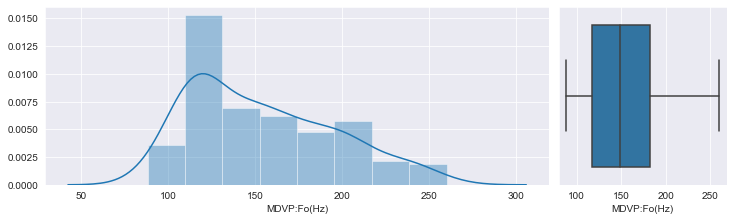

In [12]:
print("Skewness :",PDdata['MDVP:Fo(Hz)'].skew())
print("Kurtosis :",PDdata['MDVP:Fo(Hz)'].kurtosis())
print("Median :", PDdata['MDVP:Fo(Hz)'].median())
plots('MDVP:Fo(Hz)');

From this Plot,we can infer that there is no Outliers.

Here the Central Values lies aroung 150Hz,Kurtosis value is negative which means less data points around tail & since Skewness value is positive,it is slighlty right skewed

### Maximum vocal fundamental frequency (MDVP:Fhi(Hz))

Skewness : 2.542145997588398
Kurtosis : 7.627241211631889
Median : 175.829


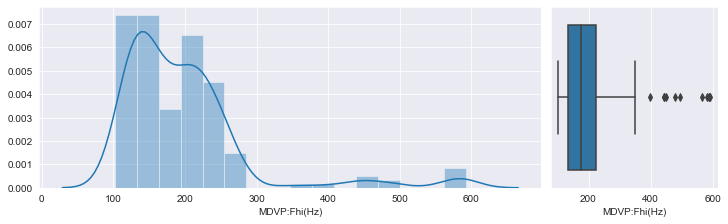

In [13]:
print("Skewness :",PDdata['MDVP:Fhi(Hz)'].skew())
print("Kurtosis :",PDdata['MDVP:Fhi(Hz)'].kurtosis())
print("Median :", PDdata['MDVP:Fhi(Hz)'].median())
plots('MDVP:Fhi(Hz)');

This Column has high number of Outliers.We need to Fix this by applying Transformation.

Here this Central Value is around 175,Kurtosis Value is very large so more number of points are around the tail & Skewness value also
greater than 1,which means heavily right skewed

#### Outlier Treatment

95th Quantile Value: 410.63979999999924
Skewness : 1.5585354347799323
Kurtosis : 2.6974790072449784


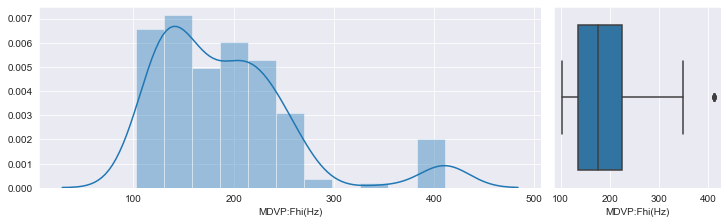

In [14]:
Q1 = PDdata["MDVP:Fhi(Hz)"].quantile(0.25)
Q3 = PDdata["MDVP:Fhi(Hz)"].quantile(0.75)
q95th = PDdata["MDVP:Fhi(Hz)"].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata["MDVP:Fhi(Hz)"] = np.where(PDdata["MDVP:Fhi(Hz)"] > UW, q95th, PDdata["MDVP:Fhi(Hz)"])
plots("MDVP:Fhi(Hz)")
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['MDVP:Fhi(Hz)'].skew())
print("Kurtosis :",PDdata['MDVP:Fhi(Hz)'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.

From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### Minimum vocal fundamental frequency (MDVP:Flo(Hz))

Skewness : 1.217350448627808
Kurtosis : 0.6546145211395396
Median : 104.315


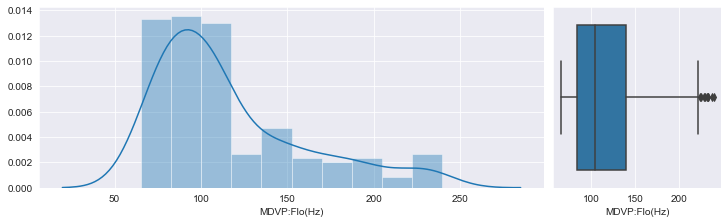

In [15]:
print("Skewness :",PDdata['MDVP:Flo(Hz)'].skew())
print("Kurtosis :",PDdata['MDVP:Flo(Hz)'].kurtosis())
print("Median :", PDdata['MDVP:Flo(Hz)'].median())
plots('MDVP:Flo(Hz)');

This Column has high number of Outliers.We need to Fix this by applying Transformation.

Here the Central Value is aroung 104,Kurtosis value is 0.65 which indicates some points are around the tail,Skewness value is 1.27 which
indicates it is right skewed.

#### Outlier Treatment

95th Quantile Value: 220.19489999999996
Skewness : 1.1219404308729495
Kurtosis : 0.30245196721884193


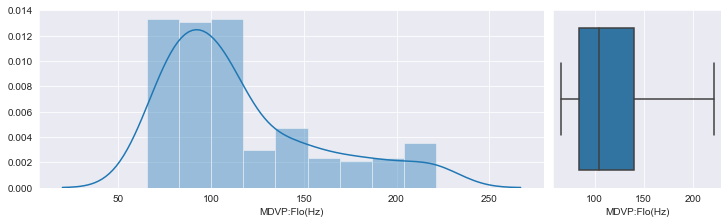

In [16]:
Q1 = PDdata['MDVP:Flo(Hz)'].quantile(0.25)
Q3 = PDdata['MDVP:Flo(Hz)'].quantile(0.75)
q95th = PDdata['MDVP:Flo(Hz)'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['MDVP:Flo(Hz)'] = np.where(PDdata['MDVP:Flo(Hz)'] > UW, q95th, PDdata['MDVP:Flo(Hz)'])
plots('MDVP:Flo(Hz)')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['MDVP:Flo(Hz)'].skew())
print("Kurtosis :",PDdata['MDVP:Flo(Hz)'].kurtosis())


Here,we are Replacing outliers with the 95th quantile value.

From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### Five measures of variation in fundamental frequency

### MDVP:Jitter(%)

Skewness : 3.0849462014441817
Kurtosis : 12.030939276179508
Median : 0.00494


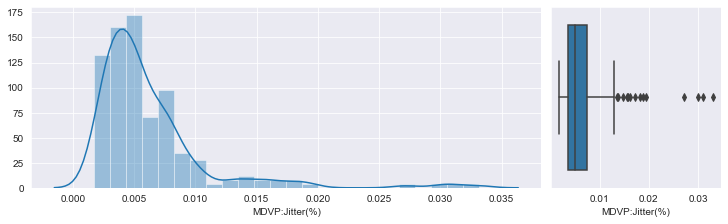

In [17]:
print("Skewness :",PDdata['MDVP:Jitter(%)'].skew())
print("Kurtosis :",PDdata['MDVP:Jitter(%)'].kurtosis())
print("Median :", PDdata['MDVP:Jitter(%)'].median())
plots('MDVP:Jitter(%)');

This Column has high number of Outliers.We need to Fix this by applying Transformation.

Here the Central Value is around 0.005,Kurtosis Value is very large so more number of points are around the tail & Skewness value also
greater than 1,which means heavily right skewed

#### Outliers Treatment

95th Quantile Value: 0.015560999999999997
Skewness : 1.514983085588185
Kurtosis : 1.908142228909231


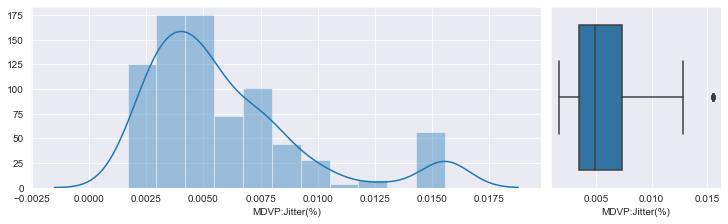

In [18]:
Q1 = PDdata['MDVP:Jitter(%)'].quantile(0.25)
Q3 = PDdata['MDVP:Jitter(%)'].quantile(0.75)
q95th = PDdata['MDVP:Jitter(%)'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['MDVP:Jitter(%)'] = np.where(PDdata['MDVP:Jitter(%)'] > UW, q95th, PDdata['MDVP:Jitter(%)'])
plots('MDVP:Jitter(%)')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['MDVP:Jitter(%)'].skew())
print("Kurtosis :",PDdata['MDVP:Jitter(%)'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.

From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### MDVP:Jitter(Abs)

Skewness : 2.6490714165257274
Kurtosis : 10.869042517763667
Median : 2.9999999999999997e-05


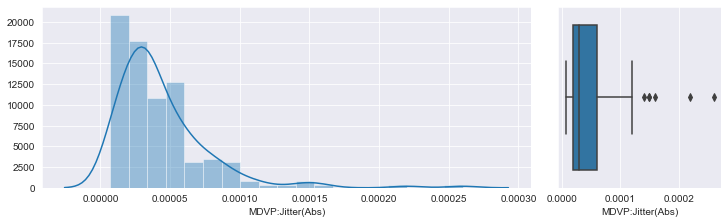

In [19]:
print("Skewness :",PDdata['MDVP:Jitter(Abs)'].skew())
print("Kurtosis :",PDdata['MDVP:Jitter(Abs)'].kurtosis())
print("Median :", PDdata['MDVP:Jitter(Abs)'].median())
plots('MDVP:Jitter(Abs)');

This Column contains few Outliers.We can apply Tranformation to fix this.

Here the Central Value is around 0.00005,Kurtosis Value is very large so more number of points are around the tail & Skewness value also greater than 1,which means heavily right skewed

#### Outliers Treatment

95th Quantile Value: 0.00010000000000000002
Skewness : 0.937383751657135
Kurtosis : 0.21326263169488335


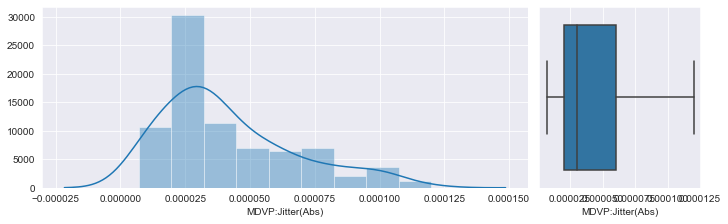

In [20]:
Q1 = PDdata['MDVP:Jitter(Abs)'].quantile(0.25)
Q3 = PDdata['MDVP:Jitter(Abs)'].quantile(0.75)
q95th = PDdata['MDVP:Jitter(Abs)'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['MDVP:Jitter(Abs)'] = np.where(PDdata['MDVP:Jitter(Abs)'] > UW, q95th, PDdata['MDVP:Jitter(Abs)'])
plots('MDVP:Jitter(Abs)')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['MDVP:Jitter(Abs)'].skew())
print("Kurtosis :",PDdata['MDVP:Jitter(Abs)'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.


From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### MDVP:RAP

Skewness : 3.360708450480554
Kurtosis : 14.213797721522418
Median : 0.0025


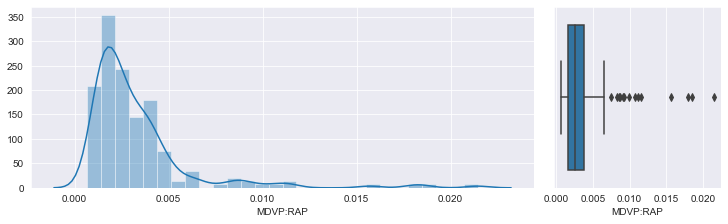

In [21]:
print("Skewness :",PDdata['MDVP:RAP'].skew())
print("Kurtosis :",PDdata['MDVP:RAP'].kurtosis())
print("Median :", PDdata['MDVP:RAP'].median())
plots('MDVP:RAP')

This Column contains high number of Outliers.We can apply Tranformation to fix this.

Here the Central Value is around 0.0025,Kurtosis Value is very large so more number of points are around the tail & Skewness value also greater than 1,which means heavily right skewed

#### Outliers Treatment

95th Quantile Value: 0.008755999999999993
Skewness : 1.5786099248203456
Kurtosis : 2.0813023116222924


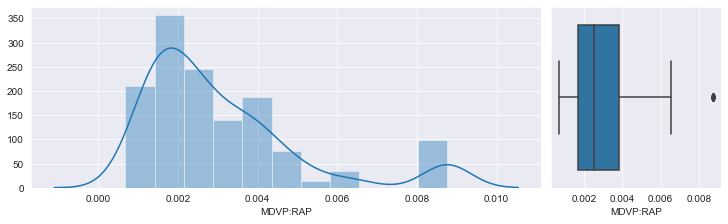

In [22]:
Q1 = PDdata['MDVP:RAP'].quantile(0.25)
Q3 = PDdata['MDVP:RAP'].quantile(0.75)
q95th = PDdata['MDVP:RAP'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['MDVP:RAP'] = np.where(PDdata['MDVP:RAP'] > UW, q95th, PDdata['MDVP:RAP'])
plots('MDVP:RAP')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['MDVP:RAP'].skew())
print("Kurtosis :",PDdata['MDVP:RAP'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.

From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### MDVP:PPQ

Skewness : 3.073892457888517
Kurtosis : 11.963922120220282
Median : 0.0026899999999999997


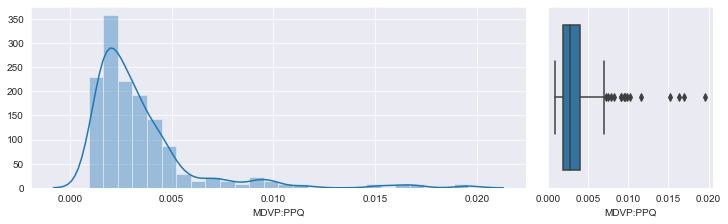

In [23]:
print("Skewness :",PDdata['MDVP:PPQ'].skew())
print("Kurtosis :",PDdata['MDVP:PPQ'].kurtosis())
print("Median :", PDdata['MDVP:PPQ'].median())
plots('MDVP:PPQ');

This Column contains high number of Outliers.We can apply Tranformation to fix this.

Here the Central Value is around 0.003,Kurtosis Value is very large so more number of points are around the tail & Skewness value also greater than 1,which means heavily right skewed

#### Outliers Treatment

95th Quantile Value: 0.009083
Skewness : 1.6376698196377757
Kurtosis : 2.1916532551789913


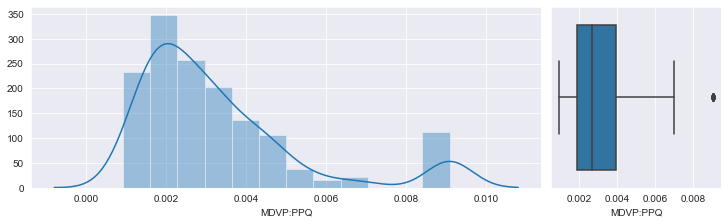

In [24]:
Q1 = PDdata['MDVP:PPQ'].quantile(0.25)
Q3 = PDdata['MDVP:PPQ'].quantile(0.75)
q95th = PDdata['MDVP:PPQ'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['MDVP:PPQ'] = np.where(PDdata['MDVP:PPQ'] > UW, q95th, PDdata['MDVP:PPQ'])
plots('MDVP:PPQ')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['MDVP:PPQ'].skew())
print("Kurtosis :",PDdata['MDVP:PPQ'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.


From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### Jitter:DDP

Skewness : 3.3620584478857203
Kurtosis : 14.224761911379424
Median : 0.007490000000000001


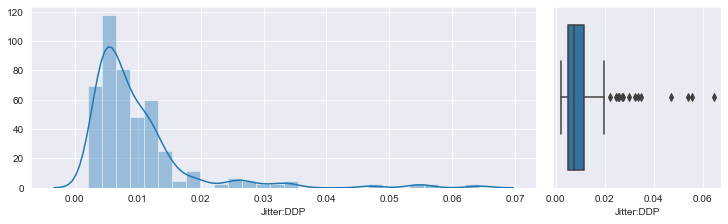

In [25]:
print("Skewness :",PDdata['Jitter:DDP'].skew())
print("Kurtosis :",PDdata['Jitter:DDP'].kurtosis())
print("Median :", PDdata['Jitter:DDP'].median())
plots('Jitter:DDP');

This Column contains high number of Outliers.We can apply Tranformation to fix this.

Here the Central Value is around 0.008,Kurtosis Value is very large so more number of points are around the tail & Skewness value also greater than 1,which means heavily right skewed

#### Outliers Treatment

95th Quantile Value: 0.026270999999999975
Skewness : 1.5793154351088399
Kurtosis : 2.08396984567759


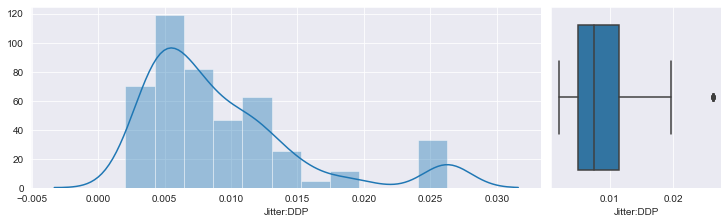

In [26]:
Q1 = PDdata['Jitter:DDP'].quantile(0.25)
Q3 = PDdata['Jitter:DDP'].quantile(0.75)
q95th = PDdata['Jitter:DDP'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['Jitter:DDP'] = np.where(PDdata['Jitter:DDP'] > UW, q95th, PDdata['Jitter:DDP'])
plots('Jitter:DDP')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['Jitter:DDP'].skew())
print("Kurtosis :",PDdata['Jitter:DDP'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.

From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

## Several measures of variation in amplitude

### MDVP:Shimmer

Skewness : 1.6664804101559663
Kurtosis : 3.2383081111007535
Median : 0.022969999999999997


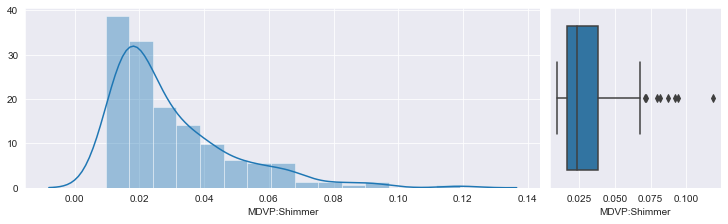

In [27]:
print("Skewness :",PDdata['MDVP:Shimmer'].skew())
print("Kurtosis :",PDdata['MDVP:Shimmer'].kurtosis())
print("Median :", PDdata['MDVP:Shimmer'].median())
plots('MDVP:Shimmer');

This Column contains few Outliers.We can apply Tranformation to fix this.

Here the Central Value is around 0.023,Kurtosis Value is very large so more number of points are around the tail & Skewness value also greater than 1,which means heavily right skewed

#### Outliers Treatment

95th Quantile Value: 0.06725600000000001
Skewness : 1.038179633530743
Kurtosis : 0.036308628640195906


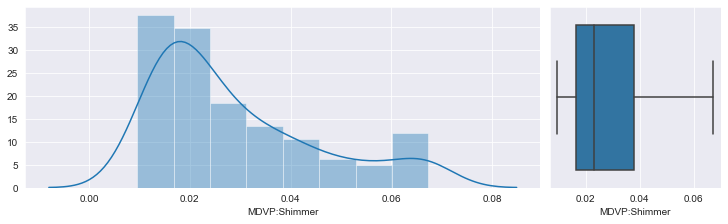

In [28]:
Q1 = PDdata['MDVP:Shimmer'].quantile(0.25)
Q3 = PDdata['MDVP:Shimmer'].quantile(0.75)
q95th = PDdata['MDVP:Shimmer'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['MDVP:Shimmer'] = np.where(PDdata['MDVP:Shimmer'] > UW, q95th, PDdata['MDVP:Shimmer'])
plots('MDVP:Shimmer')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['MDVP:Shimmer'].skew())
print("Kurtosis :",PDdata['MDVP:Shimmer'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.

From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### MDVP:Shimmer(dB)

Skewness : 1.999388639086127
Kurtosis : 5.128192509867997
Median : 0.221


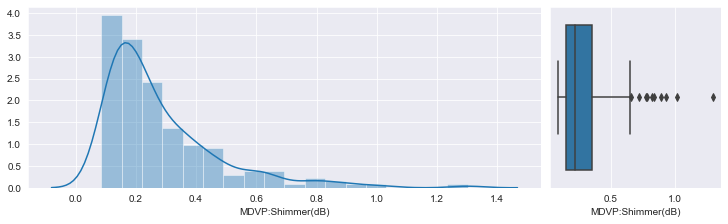

In [29]:
print("Skewness :",PDdata['MDVP:Shimmer(dB)'].skew())
print("Kurtosis :",PDdata['MDVP:Shimmer(dB)'].kurtosis())
print("Median :", PDdata['MDVP:Shimmer(dB)'].median())
plots('MDVP:Shimmer(dB)');

This Column contains high number of Outliers.We can apply Tranformation to fix this.

Here the Central Value is around 0.221,Kurtosis Value is very large so more number of points are around the tail & Skewness value also greater than 1,which means heavily right skewed

#### Outliers Treatment

95th Quantile Value: 0.6526999999999998
Skewness : 1.101621868919656
Kurtosis : 0.24286505304159256


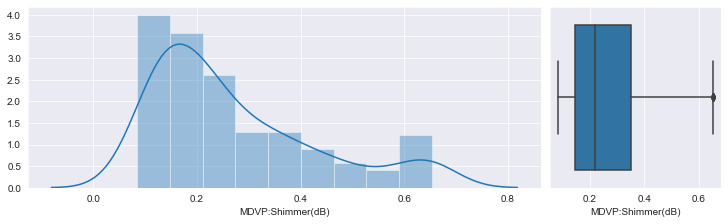

In [30]:
Q1 = PDdata['MDVP:Shimmer(dB)'].quantile(0.25)
Q3 = PDdata['MDVP:Shimmer(dB)'].quantile(0.75)
q95th = PDdata['MDVP:Shimmer(dB)'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['MDVP:Shimmer(dB)'] = np.where(PDdata['MDVP:Shimmer(dB)'] > UW, q95th, PDdata['MDVP:Shimmer(dB)'])
plots('MDVP:Shimmer(dB)')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['MDVP:Shimmer(dB)'].skew())
print("Kurtosis :",PDdata['MDVP:Shimmer(dB)'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.

From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### Shimmer:APQ3

Skewness : 1.5805763798815677
Kurtosis : 2.7201516395960734
Median : 0.012790000000000001


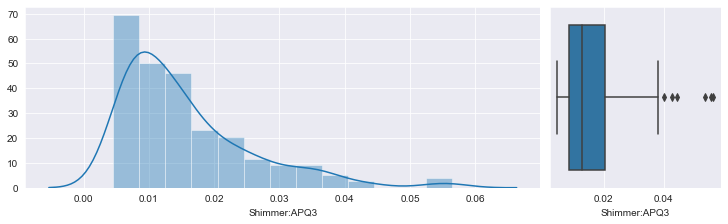

In [31]:
print("Skewness :",PDdata['Shimmer:APQ3'].skew())
print("Kurtosis :",PDdata['Shimmer:APQ3'].kurtosis())
print("Median :", PDdata['Shimmer:APQ3'].median())
plots('Shimmer:APQ3');

This Column contains few Outliers.We can apply Tranformation to fix this.

Here the Central Value is around 0.0128,Kurtosis Value is very large so more number of points are around the tail & Skewness value also greater than 1,which means heavily right skewed

#### Outliers Treatment

95th Quantile Value: 0.036226999999999995
Skewness : 1.0355859766931028
Kurtosis : 0.11741167124290097


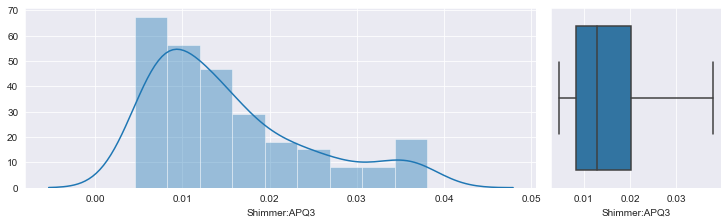

In [32]:
Q1 = PDdata['Shimmer:APQ3'].quantile(0.25)
Q3 = PDdata['Shimmer:APQ3'].quantile(0.75)
q95th = PDdata['Shimmer:APQ3'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['Shimmer:APQ3'] = np.where(PDdata['Shimmer:APQ3'] > UW, q95th, PDdata['Shimmer:APQ3'])
plots('Shimmer:APQ3')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['Shimmer:APQ3'].skew())
print("Kurtosis :",PDdata['Shimmer:APQ3'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.

From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### Shimmer:APQ5

Skewness : 1.798697066537622
Kurtosis : 3.8742096517587257
Median : 0.01347


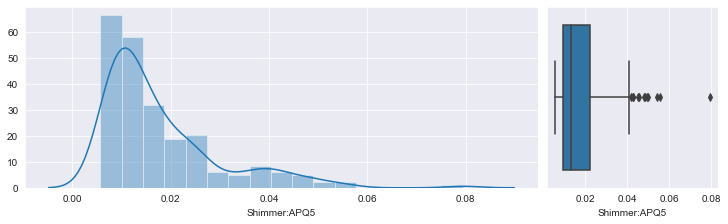

In [33]:
print("Skewness :",PDdata['Shimmer:APQ5'].skew())
print("Kurtosis :",PDdata['Shimmer:APQ5'].kurtosis())
print("Median :", PDdata['Shimmer:APQ5'].median())
plots('Shimmer:APQ5');

This Column contains high number of Outliers.We can apply Tranformation to fix this.

Here the Central Value is around 0.0134,Kurtosis Value is very large so more number of points are around the tail & Skewness value also greater than 1,which means heavily right skewed

#### Outliers Treatment

95th Quantile Value: 0.042700999999999996
Skewness : 1.2043075975689324
Kurtosis : 0.4267670575614986


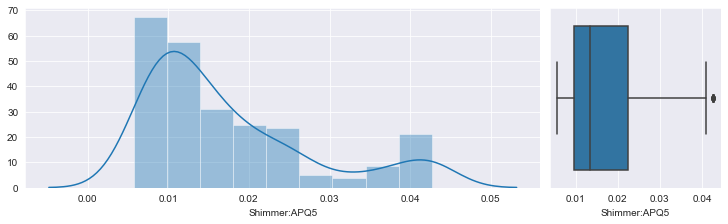

In [34]:
Q1 = PDdata['Shimmer:APQ5'].quantile(0.25)
Q3 = PDdata['Shimmer:APQ5'].quantile(0.75)
q95th = PDdata['Shimmer:APQ5'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['Shimmer:APQ5'] = np.where(PDdata['Shimmer:APQ5'] > UW, q95th, PDdata['Shimmer:APQ5'])
plots('Shimmer:APQ5')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['Shimmer:APQ5'].skew())
print("Kurtosis :",PDdata['Shimmer:APQ5'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.

From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### MDVP:APQ

Skewness : 2.618046502215422
Kurtosis : 11.163288378025502
Median : 0.01826


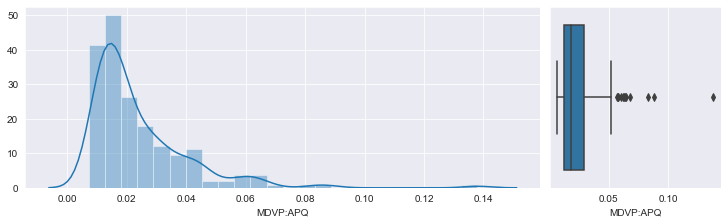

In [35]:
print("Skewness :",PDdata['MDVP:APQ'].skew())
print("Kurtosis :",PDdata['MDVP:APQ'].kurtosis())
print("Median :", PDdata['MDVP:APQ'].median())
plots('MDVP:APQ');

This Column contains high number of Outliers.We can apply Tranformation to fix this.

Here the Central Value is around 0.018,Kurtosis Value is very large so more number of points are around the tail & Skewness value also greater than 1,which means heavily right skewed

#### Outliers Treatment

95th Quantile Value: 0.057718
Skewness : 1.187822393855826
Kurtosis : 0.5121465298520462


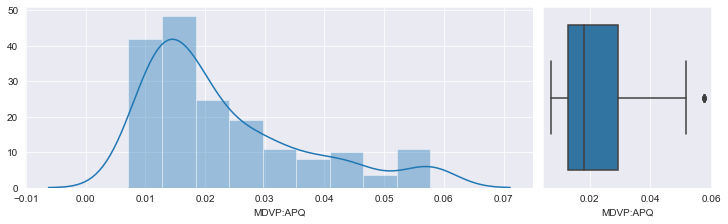

In [36]:
Q1 = PDdata['MDVP:APQ'].quantile(0.25)
Q3 = PDdata['MDVP:APQ'].quantile(0.75)
q95th = PDdata['MDVP:APQ'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['MDVP:APQ'] = np.where(PDdata['MDVP:APQ'] > UW, q95th, PDdata['MDVP:APQ'])
plots('MDVP:APQ')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['MDVP:APQ'].skew())
print("Kurtosis :",PDdata['MDVP:APQ'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.

From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### Shimmer:DDA

Skewness : 1.5806179936782263
Kurtosis : 2.720661344498221
Median : 0.038360000000000005


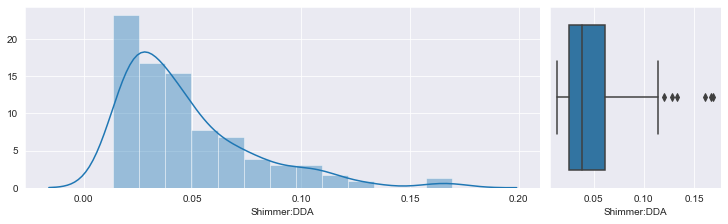

In [37]:
print("Skewness :",PDdata['Shimmer:DDA'].skew())
print("Kurtosis :",PDdata['Shimmer:DDA'].kurtosis())
print("Median :", PDdata['Shimmer:DDA'].median())
plots('Shimmer:DDA');

This Column contains few Outliers.We can apply Tranformation to fix this.

Here the Central Value is around 0.038,Kurtosis Value is very large so more number of points are around the tail & Skewness value also greater than 1,which means heavily right skewed

#### Outliers Treatment

95th Quantile Value: 0.10867799999999997
Skewness : 1.0355054798860028
Kurtosis : 0.1171290598651007


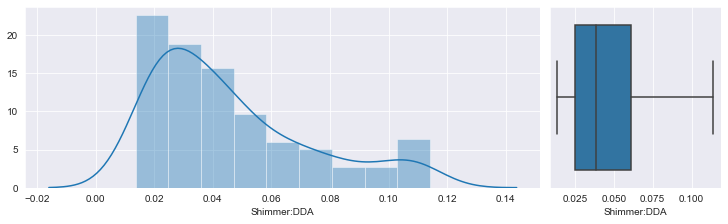

In [38]:
Q1 = PDdata['Shimmer:DDA'].quantile(0.25)
Q3 = PDdata['Shimmer:DDA'].quantile(0.75)
q95th = PDdata['Shimmer:DDA'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['Shimmer:DDA'] = np.where(PDdata['Shimmer:DDA'] > UW, q95th, PDdata['Shimmer:DDA'])
plots('Shimmer:DDA')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['Shimmer:DDA'].skew())
print("Kurtosis :",PDdata['Shimmer:DDA'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.

From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### Two nonlinear dynamical complexity measures

### NHR

Skewness : 4.22070912913906
Kurtosis : 21.994974114984924
Median : 0.01166


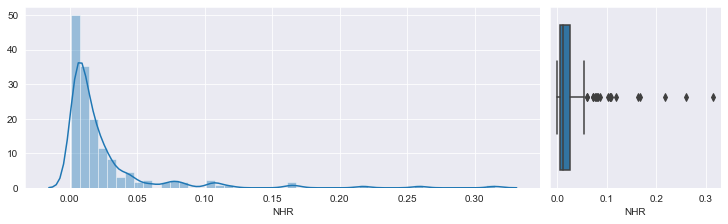

In [39]:
print("Skewness :",PDdata['NHR'].skew())
print("Kurtosis :",PDdata['NHR'].kurtosis())
print("Median :", PDdata['NHR'].median())
plots('NHR');

This Column contains huge number of Outliers.We can apply Tranformation to fix this.

Here the Central Value is around 0.012,Kurtosis Value is very large so more number of points are around the tail & Skewness value also greater than 1,which means heavily right skewed

#### Outliers Treatment

95th Quantile Value: 0.09204399999999972
Skewness : 1.9597369114137302
Kurtosis : 2.7975319457143915


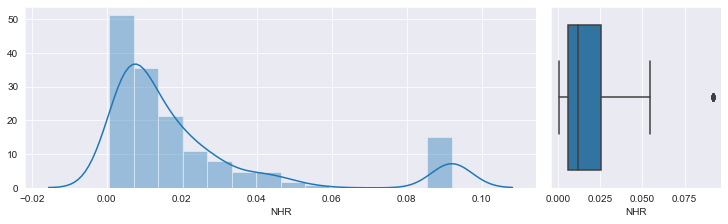

In [40]:
Q1 = PDdata['NHR'].quantile(0.25)
Q3 = PDdata['NHR'].quantile(0.75)
q95th = PDdata['NHR'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
PDdata['NHR'] = np.where(PDdata['NHR'] > UW, q95th, PDdata['NHR'])
plots('NHR')
print("95th Quantile Value:",q95th)
print("Skewness :",PDdata['NHR'].skew())
print("Kurtosis :",PDdata['NHR'].kurtosis())

Here,we are Replacing outliers with the 95th quantile value.

From the Outlier Treatment,we have removed the Outliers and reduced the Kurtosis & Skewness Value

### HNR

Skewness : -0.5143174975652068
Kurtosis : 0.6160358344019841
Median : 22.085


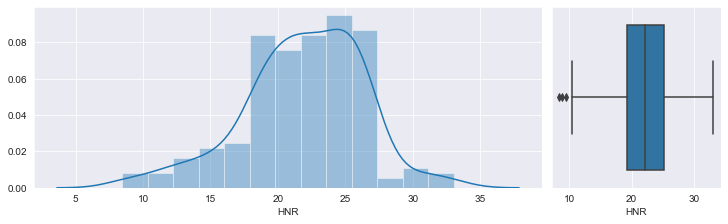

In [41]:
print("Skewness :",PDdata['HNR'].skew())
print("Kurtosis :",PDdata['HNR'].kurtosis())
print("Median :", PDdata['HNR'].median())
plots('HNR');

This Column contains only few outliers and it is acceptable

Here the Central Value is around 22 and the skewness and Kurtosis value also low.

### Two measures of ratio of noise to tonal components in the voice

### RPDE

Skewness : -0.14340241379821705
Kurtosis : -0.9217809777573227
Median : 0.495954


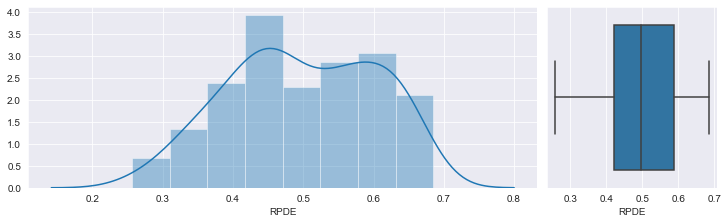

In [42]:
print("Skewness :",PDdata['RPDE'].skew())
print("Kurtosis :",PDdata['RPDE'].kurtosis())
print("Median :", PDdata['RPDE'].median())
plots('RPDE');

This Column contains only few outliers and it is acceptable

Here the Central Value is around 0.5 and the skewness and Kurtosis value also low.

### D2

Skewness : 0.4303838913329283
Kurtosis : 0.22033410480833515
Median : 2.361532


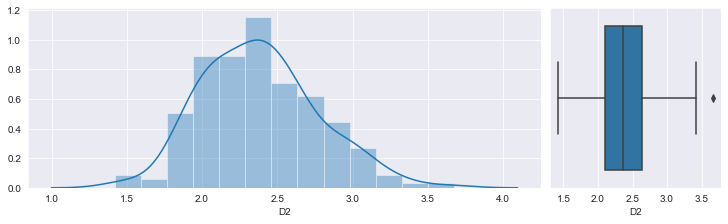

In [43]:
print("Skewness :",PDdata['D2'].skew())
print("Kurtosis :",PDdata['D2'].kurtosis())
print("Median :", PDdata['D2'].median())
plots('D2');

This Column contains only one outlier.It is acceptable

Here the Central Value is around 2.36,Kurtosis Value & Skewness value is small and it is acceptable

### Signal fractal scaling exponent

### DFA

Skewness : -0.03321366071383484
Kurtosis : -0.6861518492559342
Median : 0.722254


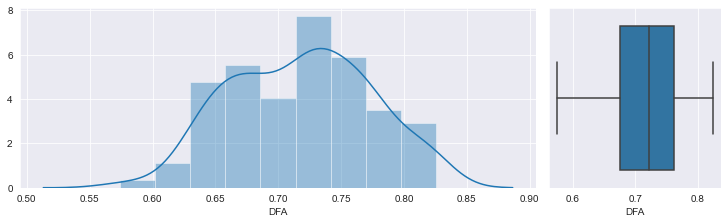

In [44]:
print("Skewness :",PDdata['DFA'].skew())
print("Kurtosis :",PDdata['DFA'].kurtosis())
print("Median :", PDdata['DFA'].median())
plots('DFA');

This Column does not have any outliers.

Here the Central Value is around 0.722,Kurtosis Value & Skewness value is small and it is acceptable

### Three nonlinear measures of fundamental frequency variation 

### Spread1

Skewness : 0.4321389320131796
Kurtosis : -0.05019918161280801
Median : -5.720868


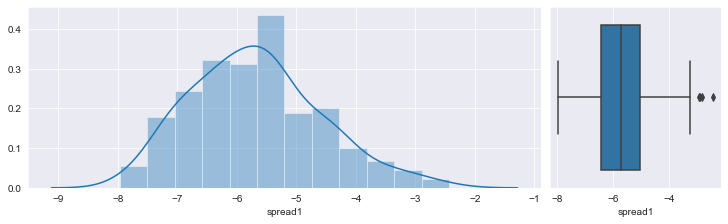

In [45]:
print("Skewness :",PDdata['spread1'].skew())
print("Kurtosis :",PDdata['spread1'].kurtosis())
print("Median :", PDdata['spread1'].median())
plots('spread1');

This Column does has few outliers and it is acceptable.

Here the Central Value is around -5.72,Kurtosis Value & Skewness value is small and it is acceptable

### Spread2

Skewness : 0.14443048549278412
Kurtosis : -0.08302289327680024
Median : 0.218885


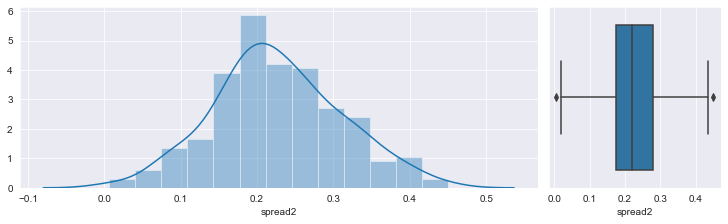

In [46]:
print("Skewness :",PDdata['spread2'].skew())
print("Kurtosis :",PDdata['spread2'].kurtosis())
print("Median :", PDdata['spread2'].median())
plots('spread2');

This Column does has few outliers and it is acceptable.

Here the Central Value is around 0.218,Kurtosis Value & Skewness value is small and it is acceptable

### PPE 

Skewness : 0.7974910716463578
Kurtosis : 0.5283349472852588
Median : 0.194052


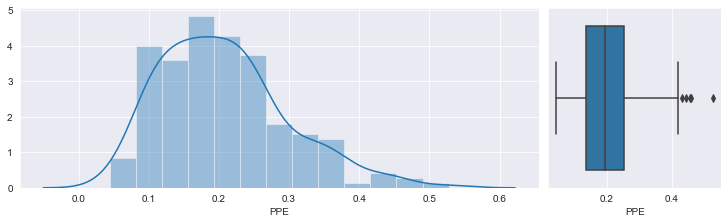

In [47]:
print("Skewness :",PDdata['PPE'].skew())
print("Kurtosis :",PDdata['PPE'].kurtosis())
print("Median :", PDdata['PPE'].median())
plots('PPE');

This Column does has few outliers and it is acceptable.

Here the Central Value is around 0.194,Kurtosis Value & Skewness value is small and it is acceptable

### Target Column Distribution

1    147
0     48
Name: status, dtype: int64


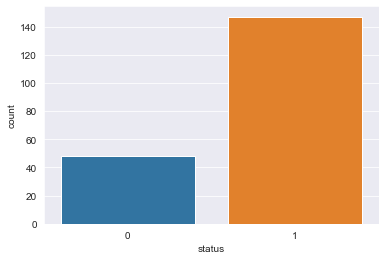

In [48]:
print(PDdata['status'].value_counts())
sns.countplot(PDdata['status']);

Here in our dataset,147 Observations is having PD disease and the remaining 48 does not have PD disease.This belongs to Imbalanced Class dataset.

## Bivariate Analysis

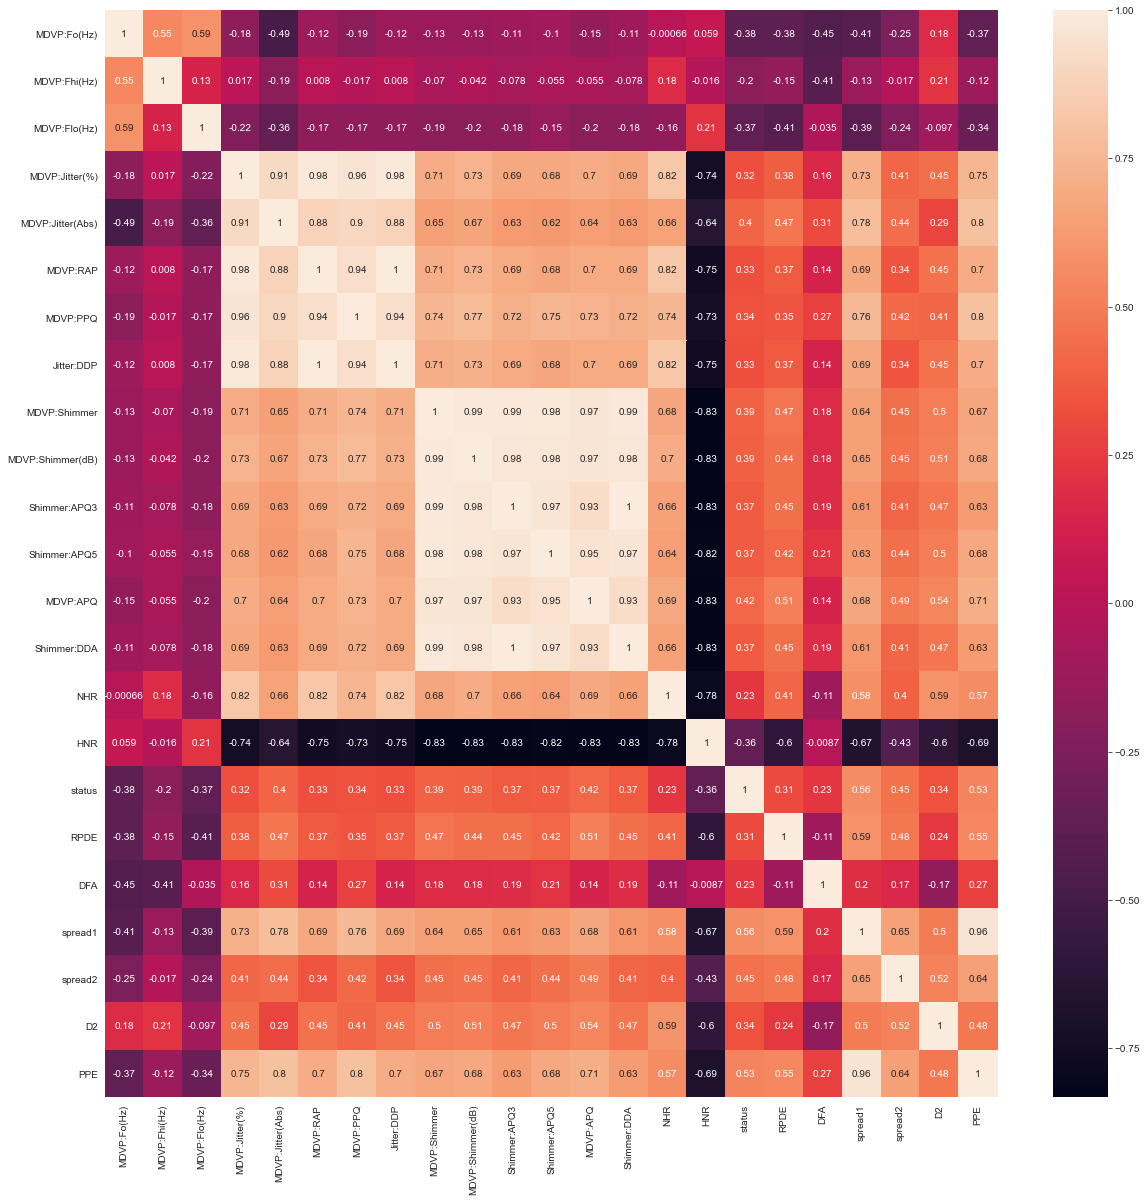

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(PDdata.corr(),annot=True);

From the Correlation Plot,we can infer that spread1,spread2,PPE,MDVP-APQ is having strong positive correlation to the Target Variable.

Also we can see that there are strong correlations between some attributes

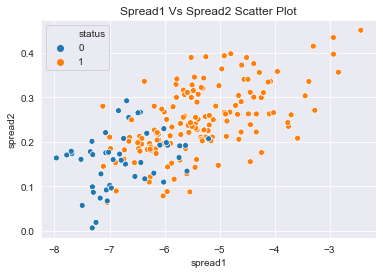

In [50]:
sns.scatterplot(x='spread1',y='spread2',data=PDdata,hue='status');
plt.title("Spread1 Vs Spread2 Scatter Plot");

Here Spread 1 and Spread 2 is having good linear correlation.Also Observations having higher Spread 1 & Spread 2 tends to have PD Disease

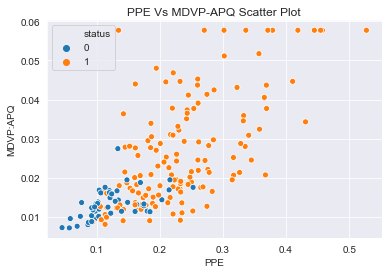

In [51]:
sns.scatterplot(x='PPE',y='MDVP:APQ',data=PDdata,hue='status');
plt.title("PPE Vs MDVP-APQ Scatter Plot");

Here PPE & MDVP-APQ is having Strong Correlations.

Observations having higher PPE & MDVP-APQ tends to PD Disease

## Feature & Target Label Selection

In [52]:
PDdata.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [53]:
X=PDdata.drop(['name','status'],axis=1)
y=PDdata['status']

Here we are Taking all the Features Expect name & status as Independent Variables.We are Ignoring name since it is unique for the Patients.

We are Choosing our Target Variable as status

### Splitting Training & Test data

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=7)

Here we are Splitting Train & test dataset as 70:30 ratio

## EDA - Scaling Numerical Attributes

In [55]:
x_train_scaled = pd.DataFrame(MinMaxScaler().fit_transform(xtrain), columns = xtrain.columns)
x_test_scaled = pd.DataFrame(MinMaxScaler().fit_transform(xtest), columns = xtest.columns)

Here we are Scaling the Trained and Test data using MinMaxScaler to Standardize the data

## Logistic Regression Model

In [56]:
logistic_model=LogisticRegression(solver='lbfgs')

In [57]:
logistic_model.fit(x_train_scaled,ytrain)

LogisticRegression()

In [58]:
print("The Training Accuracy Score is :",logistic_model.score(x_train_scaled,ytrain))
print("The Test Accuracy Score is : ",logistic_model.score(x_test_scaled,ytest))

The Training Accuracy Score is : 0.8161764705882353
The Test Accuracy Score is :  0.8305084745762712


The Accuracy score in Training data is more than test data but this is acceptable

In [59]:
ypredict=logistic_model.predict(x_test_scaled)

Here we are predicting the class using the logistic Regression model with test data

### Confusion Matrix for Logistic Regression

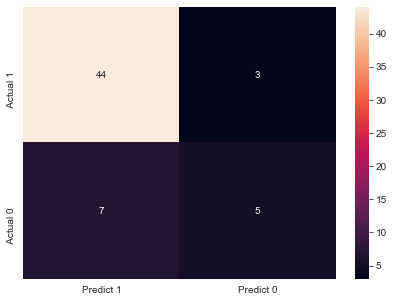

In [60]:
cm=confusion_matrix(ytest,ypredict,labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [" Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');


From this Confusion Matrix,we can observe that our Logistic Regresion model predicts,

44 Patients are having Parkinson's Disease  and it is True(True Positive)

5 Patients  are not having Parkinson's Disease  and it is True(True Negative)

7 Patients are having Parkinson's Disease and it is False(False Positive)

3 Patients  are not having Parkinson's Disease and it is False(False Negative)

In [61]:
logistic_accuracy=logistic_model.score(x_test_scaled,ytest)
logistic_precision_score=precision_score(ytest,ypredict)
logistic_recall_score=recall_score(ytest,ypredict)
logistic_f1_score=f1_score(ytest,ypredict)
print("The Accuracy of the Logistic Regression Model is",logistic_accuracy)
print("The Precison of the Logistic Regression Model is",logistic_precision_score)
print("The Recall of the Logistic Regression Model is",logistic_recall_score)
print("The f1-score of the Logistic Regression Model is",logistic_f1_score)

The Accuracy of the Logistic Regression Model is 0.8305084745762712
The Precison of the Logistic Regression Model is 0.8627450980392157
The Recall of the Logistic Regression Model is 0.9361702127659575
The f1-score of the Logistic Regression Model is 0.8979591836734694


In [62]:
print(classification_report(ytest,ypredict))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.86      0.94      0.90        47

    accuracy                           0.83        59
   macro avg       0.74      0.68      0.70        59
weighted avg       0.81      0.83      0.82        59



From the above Report,Logistic Regression performs well in predicting the Positive class,but there are few misclassification in predicting negative class.

## Naive Bayes Algorithm

In [63]:
from sklearn.naive_bayes import GaussianNB

Since we are having Continous values as features ,we are using Gaussian Naive Bayes

In [64]:
bayes_model = GaussianNB()

bayes_model.fit(x_train_scaled, ytrain)

GaussianNB()

In [65]:
print("The Training Accuracy Score is :",bayes_model.score(x_train_scaled,ytrain))
print("The Test Accuracy Score is : ",bayes_model.score(x_test_scaled,ytest))

The Training Accuracy Score is : 0.7205882352941176
The Test Accuracy Score is :  0.711864406779661


Here the Accuracy in Training & Test data is more or less same

In [66]:
bayesypredict=bayes_model.predict(x_test_scaled)

Here we are predicting the class using the Gaussian NB model with test data

### Confusion Matrix for Naive Bayes

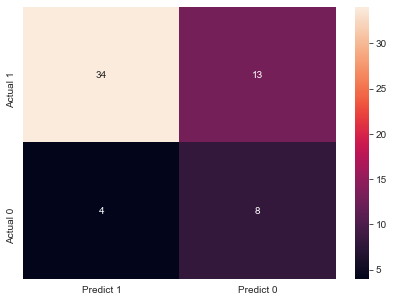

In [67]:
cm=confusion_matrix(ytest, bayesypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

From this Confusion Matrix,we can observe that our Gaussian Naive Bayes model predicts,

34 Patients are having Parkinson's Disease  and it is True(True Positive)

8 Patients  are not having Parkinson's Disease  and it is True(True Negative)

4 Patients are having Parkinson's Disease and it is False(False Positive)

13 Patients  are not having Parkinson's Disease and it is False(False Negative)

### Gaussian NB - Model Evaluation

In [68]:
bayes_accuracy=logistic_model.score(x_test_scaled,ytest)
bayes_precision_score=precision_score(ytest,bayesypredict)
bayes_recall_score=recall_score(ytest,bayesypredict)
bayes_f1_score=f1_score(ytest,bayesypredict)
print("The Accuracy of the Gaussian Naive Bayes Model is",bayes_accuracy)
print("The Precison of the Gaussian Naive Bayes Model is",bayes_precision_score)
print("The Recall of the Gaussian Naive Bayes Model is",bayes_recall_score)
print("The f1-score of the Gaussian Naive Bayes Model is",bayes_f1_score)

The Accuracy of the Gaussian Naive Bayes Model is 0.8305084745762712
The Precison of the Gaussian Naive Bayes Model is 0.8947368421052632
The Recall of the Gaussian Naive Bayes Model is 0.723404255319149
The f1-score of the Gaussian Naive Bayes Model is 0.8


In [69]:
print(classification_report(ytest,bayesypredict))

              precision    recall  f1-score   support

           0       0.38      0.67      0.48        12
           1       0.89      0.72      0.80        47

    accuracy                           0.71        59
   macro avg       0.64      0.70      0.64        59
weighted avg       0.79      0.71      0.74        59



From the above Report,Naive Bayes model performs not quite good ,since the number of misclassification is large in predicting both the classes when compared 
to other models.

## KNN Algorithm

In [70]:
knn_model=KNeighborsClassifier(n_neighbors=5,weights ='uniform')
knn_model.fit(x_train_scaled,ytrain)

KNeighborsClassifier()

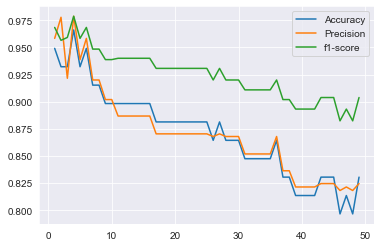

In [71]:
scores =[]
precision=[]
f1=[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'uniform' )
    NNH.fit(x_train_scaled, ytrain)
    predicted=NNH.predict(x_test_scaled)
    scores.append(NNH.score(x_test_scaled, ytest))
    precision.append(precision_score(ytest,predicted))
    f1.append(f1_score(ytest,predicted))
plt.plot(range(1,50),scores)
plt.plot(range(1,50),precision)
plt.plot(range(1,50),f1)
plt.legend(['Accuracy','Precision','f1-score']);

From this it is cleary shows that k=5 is the optimal value which gives better results

In [72]:
print("The Training Accuracy Score is :",knn_model.score(x_train_scaled,ytrain))
print("The Test Accuracy Score is : ",knn_model.score(x_test_scaled,ytest))

The Training Accuracy Score is : 0.9191176470588235
The Test Accuracy Score is :  0.9322033898305084


Here the Accuracy is more in Test data when compared to Training data and the model performs well on unseen data

In [73]:
knn_ypredict=knn_model.predict(x_test_scaled)

Here we are predicting the class using the KNN model with test data

### Confusion Matrix for KNN

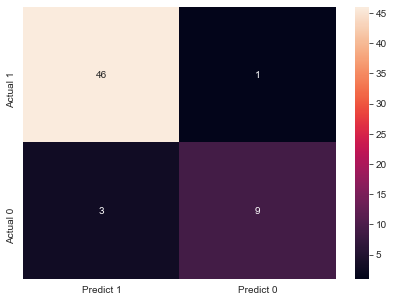

In [74]:
cm=confusion_matrix(ytest, knn_ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

From this Confusion Matrix,we can observe that our KNN model predicts,

46 Patients are having Parkinson's Disease  and it is True(True Positive)

9 Patients  are not having Parkinson's Disease  and it is True(True Negative)

3 Patients are having Parkinson's Disease and it is False(False Positive)

1 Patients  are not having Parkinson's Disease and it is False(False Negative)

### KNN -  Model Evaluation

In [75]:
knn_accuracy=knn_model.score(x_test_scaled,ytest)
knn_precision_score=precision_score(ytest,knn_ypredict)
knn_recall_score=recall_score(ytest,knn_ypredict)
knn_f1_score=f1_score(ytest,knn_ypredict)
print("The Accuracy of the KNN Model is",knn_accuracy)
print("The Precison of the KNN Model is",knn_precision_score)
print("The Recall of the KNN Model is",knn_recall_score)
print("The f1-score of the KNN Model is",knn_f1_score)

The Accuracy of the KNN Model is 0.9322033898305084
The Precison of the KNN Model is 0.9387755102040817
The Recall of the KNN Model is 0.9787234042553191
The f1-score of the KNN Model is 0.9583333333333333


In [76]:
print(classification_report(ytest,knn_ypredict))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.94      0.98      0.96        47

    accuracy                           0.93        59
   macro avg       0.92      0.86      0.89        59
weighted avg       0.93      0.93      0.93        59



From the above report,The KNN  model predicts the Positive class very well and there are few misclassification in negative 
class ,but overall this Model performs well.

### SVM Model

In [77]:
svm_model=SVC(kernel='rbf',C=2)
svm_model.fit(x_train_scaled,ytrain)

SVC(C=2)

By Varying the C Parameter with the different Values,we find out C=2 is the optimal value which gives high accuracy

In [78]:
print("The Training Accuracy Score is :",svm_model.score(x_train_scaled,ytrain))
print("The Test Accuracy Score is : ",svm_model.score(x_test_scaled,ytest))

The Training Accuracy Score is : 0.8970588235294118
The Test Accuracy Score is :  0.8983050847457628


Here the Accuracy in Training & Test data is more or less same

In [79]:
svm_ypredict=svm_model.predict(x_test_scaled)

Here we are predicting the class using the SVM model with test data

### Confusion Matrix for SVM

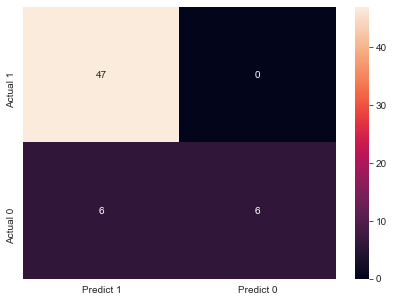

In [80]:
cm=confusion_matrix(ytest, svm_ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

From this Confusion Matrix,we can observe that our SVM model predicts,

47 Patients are having Parkinson's Disease  and it is True(True Positive)

6 Patients  are not having Parkinson's Disease  and it is True(True Negative)

6 Patients are having Parkinson's Disease and it is False(False Positive)

0 Patients  are not having Parkinson's Disease and it is False(False Negative)

### SVM -  Model Evaluation

In [81]:
svm_accuracy=svm_model.score(x_test_scaled,ytest)
svm_precision_score=precision_score(ytest,svm_ypredict)
svm_recall_score=recall_score(ytest,svm_ypredict)
svm_f1_score=f1_score(ytest,svm_ypredict)
print("The Accuracy of the SVM Model is",svm_accuracy)
print("The Precison of the SVM Model is",svm_precision_score)
print("The Recall of the SVM Model is",svm_recall_score)
print("The f1-score of the SVM Model is",svm_f1_score)

The Accuracy of the SVM Model is 0.8983050847457628
The Precison of the SVM Model is 0.8867924528301887
The Recall of the SVM Model is 1.0
The f1-score of the SVM Model is 0.9400000000000001


In [82]:
print(classification_report(ytest,svm_ypredict))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.89      1.00      0.94        47

    accuracy                           0.90        59
   macro avg       0.94      0.75      0.80        59
weighted avg       0.91      0.90      0.88        59



From the above report,The SVM  model predicts the Positive class very well and there are few misclassification in negative 
class ,but overall this Model performs well.

### Decision Tree Model

In [83]:
dtree_model=DecisionTreeClassifier(max_depth=2)
dtree_model.fit(x_train_scaled,ytrain)

DecisionTreeClassifier(max_depth=2)

In [84]:
print("The Training Accuracy Score is :",dtree_model.score(x_train_scaled,ytrain))
print("The Test Accuracy Score is : ",dtree_model.score(x_test_scaled,ytest))

The Training Accuracy Score is : 0.875
The Test Accuracy Score is :  0.847457627118644


The Accuracy score in Training data is more than test data but this is acceptable

In [85]:
dtree_ypredict=dtree_model.predict(x_test_scaled)

Here we are predicting the class using the Decision Tree model with test data

### Confusion Matrix for Decision Tree

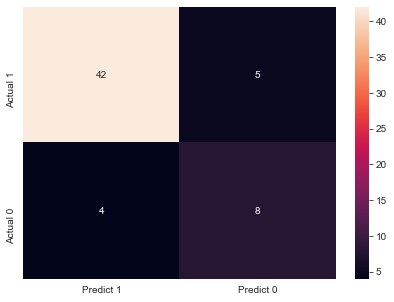

In [86]:
cm=confusion_matrix(ytest,dtree_ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

From this Confusion Matrix,we can observe that our Decision Tree model predicts,

42 Patients are having Parkinson's Disease  and it is True(True Positive)

8 Patients  are not having Parkinson's Disease  and it is True(True Negative)

4 Patients are having Parkinson's Disease and it is False(False Positive)

5 Patients  are not having Parkinson's Disease and it is False(False Negative)

### Decision Tree -  Model Evaluation

In [87]:
dtree_accuracy=dtree_model.score(x_test_scaled,ytest)
dtree_precision_score=precision_score(ytest,dtree_ypredict)
dtree_recall_score=recall_score(ytest,dtree_ypredict)
dtree_f1_score=f1_score(ytest,dtree_ypredict)
print("The Accuracy of the Decision Tree Model is",dtree_accuracy)
print("The Precison of the Decision Tree Model is",dtree_precision_score)
print("The Recall of the Decision Tree Model is",dtree_recall_score)
print("The f1-score of the Decision Tree Model is",dtree_f1_score)

The Accuracy of the Decision Tree Model is 0.847457627118644
The Precison of the Decision Tree Model is 0.9130434782608695
The Recall of the Decision Tree Model is 0.8936170212765957
The f1-score of the Decision Tree Model is 0.9032258064516129


In [88]:
print(classification_report(ytest,dtree_ypredict))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.91      0.89      0.90        47

    accuracy                           0.85        59
   macro avg       0.76      0.78      0.77        59
weighted avg       0.85      0.85      0.85        59



From the above Report,Decision Tree model performs not quite good ,since the number of misclassification is large when compared 
to other models.

## Meta Classifier

In [89]:
basemodels = [('dtree',dtree_model),('svm',SVC())]
metamodel = LogisticRegression()
stacking_model = StackingClassifier(estimators=basemodels,final_estimator=metamodel)
stacking_model.fit(x_train_scaled,ytrain)

StackingClassifier(estimators=[('dtree', DecisionTreeClassifier(max_depth=2)),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

Here we taking base models as Decision Tree and SVM and the metamodel as Logistic Regression

In [90]:
print("The Training Accuracy Score is :",stacking_model.score(x_train_scaled,ytrain))
print("The Test Accuracy Score is : ",stacking_model.score(x_test_scaled,ytest))

The Training Accuracy Score is : 0.8823529411764706
The Test Accuracy Score is :  0.9152542372881356


Here the Accuracy is more in Test data when compared to Training data and the model performs well on unseen data

In [91]:
stackypredict=stacking_model.predict(x_test_scaled)

### Confusion Matrix for Meta Classifier

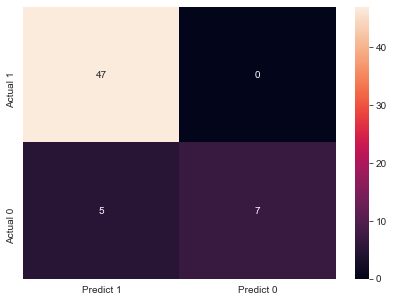

In [92]:
cm=confusion_matrix(ytest, stackypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

From this Confusion Matrix,we can observe that our Meta Classifier model predicts,

47 Patients are having Parkinson's Disease  and it is True(True Positive)

7 Patients  are not having Parkinson's Disease  and it is True(True Negative)

5 Patients are having Parkinson's Disease and it is False(False Positive)

0 Patients  are not having Parkinson's Disease and it is False(False Negative)

In [93]:
stacking_accuracy=stacking_model.score(x_test_scaled,ytest)
stacking_precision_score=precision_score(ytest,stackypredict)
stacking_recall_score=recall_score(ytest,stackypredict)
stacking_f1_score=f1_score(ytest,stackypredict)
print("The Accuracy of the Stacking Model is",stacking_accuracy)
print("The Precison of the Stacking Model is",stacking_precision_score)
print("The Recall of the Stacking Model is",stacking_recall_score)
print("The f1-score of the Stacking Model is",stacking_f1_score)

The Accuracy of the Stacking Model is 0.9152542372881356
The Precison of the Stacking Model is 0.9038461538461539
The Recall of the Stacking Model is 1.0
The f1-score of the Stacking Model is 0.9494949494949495


In [94]:
print(classification_report(ytest,stackypredict))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        47

    accuracy                           0.92        59
   macro avg       0.95      0.79      0.84        59
weighted avg       0.92      0.92      0.91        59



From the above report,The Meta Classifier model predicts the Positive class very well and there are few misclassification in negative 
class ,but overall this Model performs well

## Standard Ensemble Model

### Random Forest

In [115]:
RFmodel = RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=3,random_state=5,max_features='sqrt')

Here we are using max_depth to avoid overfitting of the model

In [116]:
RFmodel.fit(x_train_scaled,ytrain)

RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=20,
                       random_state=5)

In [117]:
print("The Training Accuracy Score is :",RFmodel.score(x_train_scaled,ytrain))
print("The Test Accuracy Score is : ",RFmodel.score(x_test_scaled,ytest))

The Training Accuracy Score is : 0.9338235294117647
The Test Accuracy Score is :  0.8813559322033898


The Accuracy score in Training data is more than test data but this is acceptable

In [113]:
rf_ypredict=RFmodel.predict(x_test_scaled)

### Confusion Matrix

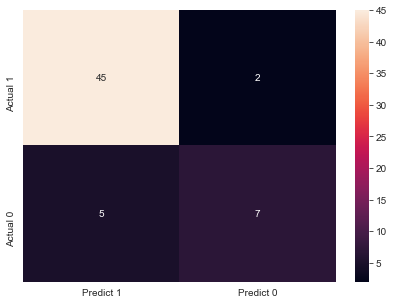

In [114]:
cm=confusion_matrix(ytest, rf_ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

From this Confusion Matrix,we can observe that our Random Forest model predicts,

45 Patients are having Parkinson's Disease  and it is True(True Positive)

7 Patients  are not having Parkinson's Disease  and it is True(True Negative)

5 Patients are having Parkinson's Disease and it is False(False Positive)

2 Patients  are not having Parkinson's Disease and it is False(False Negative)

In [100]:
rf_accuracy=RFmodel.score(x_test_scaled,ytest)
rf_precision_score=precision_score(ytest,rf_ypredict)
rf_recall_score=recall_score(ytest,rf_ypredict)
rf_f1_score=f1_score(ytest,rf_ypredict)
print("The Accuracy of the Random Forest Model is",rf_accuracy)
print("The Precison of the Random Forest Model is",rf_precision_score)
print("The Recall of the Random Forest Model is",rf_recall_score)
print("The f1-score of the Random Forest Model is",rf_f1_score)

The Accuracy of the Random Forest Model is 0.8813559322033898
The Precison of the Random Forest Model is 0.9
The Recall of the Random Forest Model is 0.9574468085106383
The f1-score of the Random Forest Model is 0.9278350515463918


In [101]:
print(classification_report(ytest,rf_ypredict))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.90      0.96      0.93        47

    accuracy                           0.88        59
   macro avg       0.84      0.77      0.80        59
weighted avg       0.88      0.88      0.87        59



From the above report,the Random Forest Model has some misclassification in both the class but this is acceptable

### Gradient Boosting

In [102]:
gboost_model = GradientBoostingClassifier(random_state=5,max_features='sqrt',max_depth=2)

Here we are using max_depth to avoid overfitting of the model

In [103]:
gboost_model.fit(x_train_scaled,ytrain)

GradientBoostingClassifier(max_depth=2, max_features='sqrt', random_state=5)

In [104]:
print("The Training Accuracy Score is :",gboost_model.score(x_train_scaled,ytrain))
print("The Test Accuracy Score is : ",gboost_model.score(x_test_scaled,ytest))

The Training Accuracy Score is : 1.0
The Test Accuracy Score is :  0.9152542372881356


Here the accuracy score is very high in Training data when compared to Test data but this is accepatable

In [105]:
gboost_ypredict=gboost_model.predict(x_test_scaled)

### Confusion Matrix

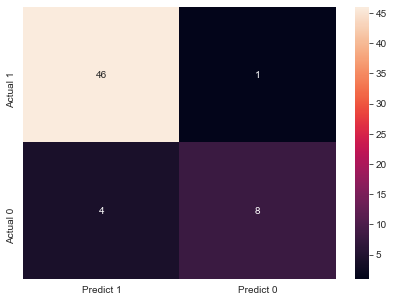

In [106]:
cm=confusion_matrix(ytest, gboost_ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

From this Confusion Matrix,we can observe that our Gradient Boosting model predicts,

46 Patients are having Parkinson's Disease  and it is True(True Positive)

8 Patients  are not having Parkinson's Disease  and it is True(True Negative)

4 Patients are having Parkinson's Disease and it is False(False Positive)

1 Patients  are not having Parkinson's Disease and it is False(False Negative)

In [107]:
gboost_accuracy=gboost_model.score(x_test_scaled,ytest)
gboost_precision_score=precision_score(ytest,gboost_ypredict)
gboost_recall_score=recall_score(ytest,gboost_ypredict)
gboost_f1_score=f1_score(ytest,gboost_ypredict)
print("The Accuracy of the Gradient Boosting Model is",gboost_accuracy)
print("The Precison of the Gradient Boosting Model is",gboost_precision_score)
print("The Recall of the Gradient Boosting Model is",gboost_recall_score)
print("The f1-score of the Gradient Boosting Model is",gboost_f1_score)

The Accuracy of the Gradient Boosting Model is 0.9152542372881356
The Precison of the Gradient Boosting Model is 0.92
The Recall of the Gradient Boosting Model is 0.9787234042553191
The f1-score of the Gradient Boosting Model is 0.9484536082474226


In [108]:
print(classification_report(ytest,gboost_ypredict))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.92      0.98      0.95        47

    accuracy                           0.92        59
   macro avg       0.90      0.82      0.86        59
weighted avg       0.91      0.92      0.91        59



From the above report,we can infer that Gradient Boosting Model predicts positive class very well and there are some misclassification
in predicting negative class.In Overall this Model has good score in all the Metrics when compared to other models.

## Model Selection

Mean Precison :Logistic R: 0.855538 (0.046373)
Mean Recall :Logistic R: 0.952381 (0.068280)
Mean f1-Score :Logistic R: 0.899661 (0.043547)
Mean Accuracy :Logistic R: 0.841579 (0.065270)
-------------------------------------
Mean Precison :KNN: 0.940841 (0.033357)
Mean Recall :KNN: 0.958571 (0.055289)
Mean f1-Score :KNN: 0.948577 (0.033335)
Mean Accuracy :KNN: 0.922368 (0.048698)
-------------------------------------
Mean Precison :NB: 0.930330 (0.074523)
Mean Recall :NB: 0.658571 (0.107160)
Mean f1-Score :NB: 0.767885 (0.094416)
Mean Accuracy :NB: 0.706053 (0.105598)
-------------------------------------
Mean Precison :SVM: 0.872050 (0.050107)
Mean Recall :SVM: 0.992857 (0.021429)
Mean f1-Score :SVM: 0.927445 (0.026638)
Mean Accuracy :SVM: 0.882368 (0.045398)
-------------------------------------
Mean Precison :DTree: 0.861897 (0.055899)
Mean Recall :DTree: 0.945714 (0.051473)
Mean f1-Score :DTree: 0.896215 (0.029902)
Mean Accuracy :DTree: 0.841316 (0.051997)
--------------------------

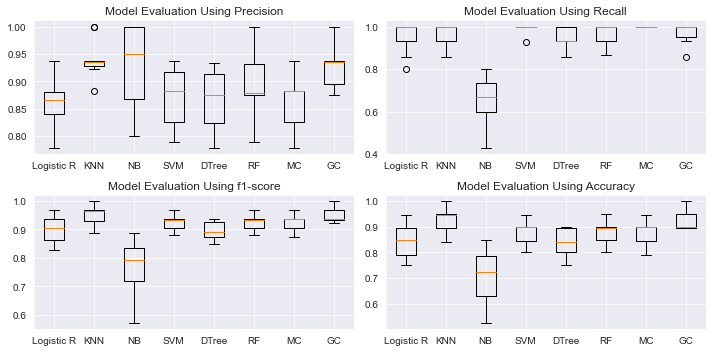

In [109]:
X_scaled=pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)
models = []
models.append(('Logistic R',LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC(kernel='rbf',C=2)))
models.append(('DTree',DecisionTreeClassifier(max_depth=2)))
models.append(('RF',RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=3,random_state=5,max_features='sqrt')))
models.append(('MC',StackingClassifier(estimators=basemodels,final_estimator=metamodel)))
models.append(('GC',GradientBoostingClassifier(random_state=5,max_features='sqrt',max_depth=2)))
# evaluate each model in turn
f1results = []
precisonresults=[]
recallresults=[]
accuracyresults=[]
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=7)
    cv_f1 = cross_val_score(model, X_scaled, y, cv=kfold, scoring='f1')
    cv_precision=cross_val_score(model, X_scaled, y, cv=kfold, scoring='precision')
    cv_recall=cross_val_score(model, X_scaled, y, cv=kfold, scoring='recall')
    cv_accuracy=cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    f1results.append(cv_f1)
    precisonresults.append(cv_precision)
    recallresults.append(cv_recall)
    accuracyresults.append(cv_accuracy)
    names.append(name)
    print("Mean Precison :%s: %f (%f)" % (name, cv_precision.mean(), cv_precision.std()))
    print("Mean Recall :%s: %f (%f)" % (name, cv_recall.mean(), cv_recall.std()))
    print("Mean f1-Score :%s: %f (%f)" % (name, cv_f1.mean(), cv_f1.std()))
    print("Mean Accuracy :%s: %f (%f)" % (name, cv_accuracy.mean(), cv_accuracy.std()))
    print("-------------------------------------")

plt.figure(figsize=(10,5))
plt.subplot(2,2,1);
plt.title('Model Evaluation Using Precision')
plt.boxplot(precisonresults,labels=names)


plt.subplot(2,2,2); 
plt.title('Model Evaluation Using Recall')
plt.boxplot(recallresults,labels=names);
#plt.set_xticklabels(names)

plt.subplot(2,2,3); 
plt.title('Model Evaluation Using f1-score')
plt.boxplot(f1results,labels=names);
#plt.set_xticklabels(names)

plt.subplot(2,2,4); 
plt.title('Model Evaluation Using Accuracy')
plt.boxplot(accuracyresults,labels=names);

plt.tight_layout()
plt.show()


Here we are using Cross Validation Technique to find the Best Model in Out of sample data.Since we are having Imbalanced dataset we are using Stratified k-fold Technique for Cross Validation.Since our main aim is to correctly Predict the Patients who are having Parkinsons' Disease we take precision ,recall,f1-score & accuracy to find out the best model

From the Cross Validation it clearly shows that Gradient Boosting & KNN has higher Accuracy,precision,f1-score,Recall and the Standard Deviation is also less when compared to other different algorithms,but Gradient Boosting is likely to overfit the Model,So we are choosing KNN Classifier as the Best model.

So we decided to use KNN algorithm with neighbours as 5  to predict the Parkinsons Disease

KNN is performing well,since it is non-parametric and it is a small dataset.
